<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/GTSPP_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GTSPP Data

This notebook graphs temperature and salinity against time, as recorded in a dataset in the RIDDC ERDDAP server. I believe this is at one specific location (can be confirmed by checking the map at the ERDDAP server).

In [ ]:
!pip install eofs
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#To use cartopy in a Colab notebook, I need a particular sequence of installs (as shown at this notebook: https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/quakes.ipynb#scrollTo=3LkZkXvnMAr4)
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;
!pip install shapely --no-binary shapely;
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import calendar
import datetime

<function example_data_path at 0x7f860011eea0>
[6. 6. 6. ... 5. 5. 5.]


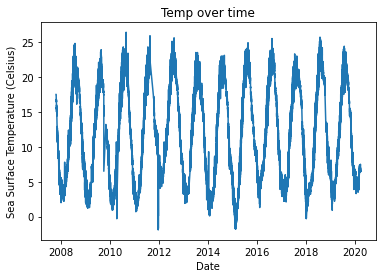

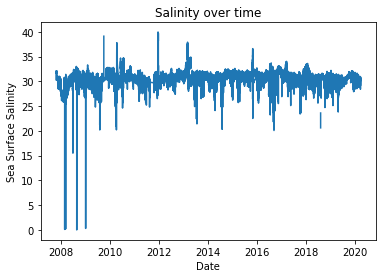

In [9]:
#making the url, opening the dataset:
url = 'https://pricaimcit.services.brown.edu/erddap/tabledap/erdGtsppBest.nc?station_id%2Clongitude%2Clatitude%2Ctime%2Cdepth%2Ctemperature%2Csalinity&longitude=-71.321&latitude=41.579&time%3E=1985-03-31T13%3A15%3A00Z&time%3C=2020-03-30T10%3A08%3A00Z'
r = requests.get(url, allow_redirects=True)
open('test.nc', 'wb').write(r.content)
nc = NetCDFFile('test.nc')
nc
#defining dataset variables:
time = nc.variables['time'][:]
time = nc.variables['time'][:]
mapvar = nc.variables['temperature'][:]
salinity = nc.variables['salinity'][:]
depth = nc.variables['depth'][:]
lat = nc.variables['latitude'][:]
#making a list of times for graphing:
timearray = []
for i in time:
  timearray.append(datetime.fromtimestamp(i))
plt.plot(timearray, mapvar)
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature (Celsius)')
plt.title('Temp over time')
plt.show()
plt.plot(timearray, salinity)
plt.xlabel('Date')
plt.ylabel('Sea Surface Salinity')
plt.title('Salinity over time')
plt.show()